In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sportsref.baseball import Season
import seaborn as sns

In [2]:
szn21 = Season(2021)

In [3]:
pit_df = szn21.batting_pages('pitches').get_df('teams_pitches_batting')

Available tables: ['teams_pitches_batting', 'players_pitches_batting']


In [4]:
plot_df = pit_df[["Tm", "30c", "30s"]]
plot_df.columns = ["Tm", 'seen', 'swung']
plot_df = plot_df.query("Tm != 'LgAvg'")
plot_df

,Tm,seen,swung
0,ARI,80,7
1,ATL,81,13
2,BAL,71,8
3,BOS,69,4
4,CHC,82,9
5,CHW,87,5
6,CIN,80,9
7,CLE,78,9
8,COL,75,3
9,DET,56,7


In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05)

In [6]:
plt.xkcd()

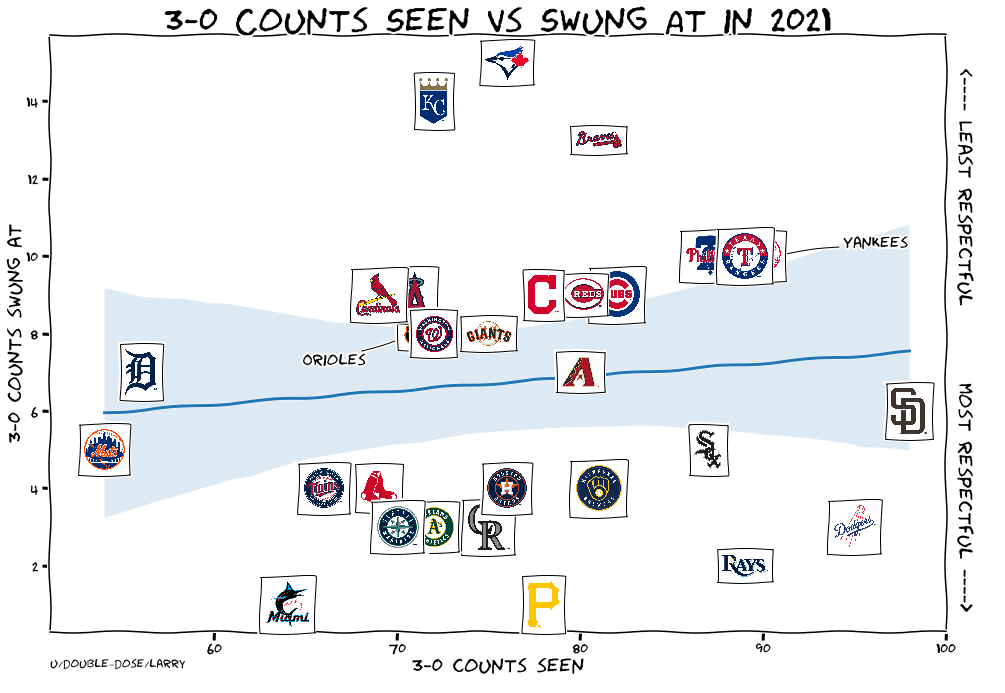

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

seen,swung = plot_df["seen"], plot_df["swung"]

sns.regplot(seen, swung)

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Tm}.png'),
                      (tm.seen, tm.swung),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

plt.xlabel("3-0 counts seen", size=20)
plt.ylabel("3-0 counts swung at", size=20)
plt.title("3-0 Counts Seen vs Swung At in 2021", size=35)
plt.annotate('<---- Least respectful        most respectful ---->',
            xy=(.96, .9), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=20, rotation=-90)
#sign
plt.annotate('u/double_dose/larry',
            xy=(.05, .05), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
## annotate the yanees
tm = plot_df.query('Tm == "NYY"').iloc[0]
ax.annotate(
    "Yankees",
    (tm["seen"], tm["swung"]),
    size=16,
    xytext = (50, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)
## annotate the Os
tm = plot_df.query('Tm == "BAL"').iloc[0]
ax.annotate(
    "Orioles",
    (tm["seen"], tm["swung"]),
    size=16,
    xytext = (-113, -30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

plt.xlim((51,100))
plt.tight_layout()
plt.savefig("most_least_respect.png")
